In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hp = pd.read_csv ('Downloads/housing_price_dataset.csv')

In [2]:
hp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
hp.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [7]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [9]:
hp.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [11]:
hp.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [13]:
hp.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Neighborhood']:
    hp[i]=le.fit_transform (hp[i])
hp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [17]:
x = hp.drop (['Price', 'Neighborhood'], axis=1)
x             

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
0,2126,4,1,1969
1,2459,3,2,1980
2,1860,2,1,1970
3,2294,2,1,1996
4,2130,5,2,2001
...,...,...,...,...
49995,1282,5,3,1975
49996,2854,2,2,1988
49997,2979,5,3,1962
49998,2596,5,2,1984


In [19]:
y = hp[['Price', 'Neighborhood']]
y

,Price,Neighborhood
0,215355.283618,0
1,195014.221626,0
2,306891.012076,1
3,206786.787153,2
4,272436.239065,1
...,...,...
49995,100080.865895,0
49996,374507.656727,1
49997,384110.555590,1
49998,380512.685957,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
m1 = mms.fit_transform(x)
m1

array([[0.56328164, 0.66666667, 0.        , 0.26760563],
       [0.72986493, 0.33333333, 0.5       , 0.42253521],
       [0.43021511, 0.        , 0.        , 0.28169014],
       ...,
       [0.989995  , 1.        , 1.        , 0.16901408],
       [0.7983992 , 1.        , 0.5       , 0.47887324],
       [0.28614307, 1.        , 1.        , 0.85915493]])

In [23]:
df = pd.DataFrame (m1, columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt'])
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
0,0.563282,0.666667,0.0,0.267606
1,0.729865,0.333333,0.5,0.422535
2,0.430215,0.000000,0.0,0.281690
3,0.647324,0.000000,0.0,0.647887
4,0.565283,1.000000,0.5,0.718310
...,...,...,...,...
49995,0.141071,1.000000,1.0,0.352113
49996,0.927464,0.000000,0.5,0.535211
49997,0.989995,1.000000,1.0,0.169014
49998,0.798399,1.000000,0.5,0.478873


In [25]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.503439,0.499567,0.497710,0.498654
std,0.287901,0.372109,0.407925,0.291822
min,0.000000,0.000000,0.000000,0.000000
25%,0.256628,0.333333,0.000000,0.239437
50%,0.503752,0.333333,0.500000,0.492958
75%,0.753377,0.666667,1.000000,0.746479
max,1.000000,1.000000,1.000000,1.000000


In [27]:
combine = pd.concat ([df, y], axis = 1)
combine

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood
0,0.563282,0.666667,0.0,0.267606,215355.283618,0
1,0.729865,0.333333,0.5,0.422535,195014.221626,0
2,0.430215,0.000000,0.0,0.281690,306891.012076,1
3,0.647324,0.000000,0.0,0.647887,206786.787153,2
4,0.565283,1.000000,0.5,0.718310,272436.239065,1
...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.352113,100080.865895,0
49996,0.927464,0.000000,0.5,0.535211,374507.656727,1
49997,0.989995,1.000000,1.0,0.169014,384110.555590,1
49998,0.798399,1.000000,0.5,0.478873,380512.685957,0


In [31]:
ip = combine.drop ('Price', axis = 1)
op = combine ['Price']
print (pd.DataFrame(op))
print (pd.DataFrame (ip))

               Price
0      215355.283618
1      195014.221626
2      306891.012076
3      206786.787153
4      272436.239065
...              ...
49995  100080.865895
49996  374507.656727
49997  384110.555590
49998  380512.685957
49999  221618.583218

[50000 rows x 1 columns]
       SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood
0        0.563282  0.666667        0.0   0.267606             0
1        0.729865  0.333333        0.5   0.422535             0
2        0.430215  0.000000        0.0   0.281690             1
3        0.647324  0.000000        0.0   0.647887             2
4        0.565283  1.000000        0.5   0.718310             1
...           ...       ...        ...        ...           ...
49995    0.141071  1.000000        1.0   0.352113             0
49996    0.927464  0.000000        0.5   0.535211             1
49997    0.989995  1.000000        1.0   0.169014             1
49998    0.798399  1.000000        0.5   0.478873             0
49999    0.286143 

In [37]:
from sklearn.model_selection import train_test_split
ip_train, ip_test, op_train, op_test = train_test_split (ip,op, test_size = 0.25, random_state = 42)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
k_metric =[]
neighbors = np.arange (1,15)
for k in neighbors:
    KNN = KNeighborsRegressor (n_neighbors = k)
    model = KNN.fit(ip_train, op_train)
    pred_KNN = model.predict (ip_test)
    score = r2_score (op_test, pred_KNN)
    k_metric.append (score)

In [45]:
k_metric

[0.13709127809600075,
 0.3565995298302831,
 0.42487041404189096,
 0.4604506207550013,
 0.4838927349391171,
 0.5003898412119479,
 0.5110558187152409,
 0.5200923261280963,
 0.5246303031721866,
 0.5291200684249471,
 0.5320726092831896,
 0.5359149485667889,
 0.53914803333539,
 0.5406351680419501]

Text(0, 0.5, 'Accuracy')

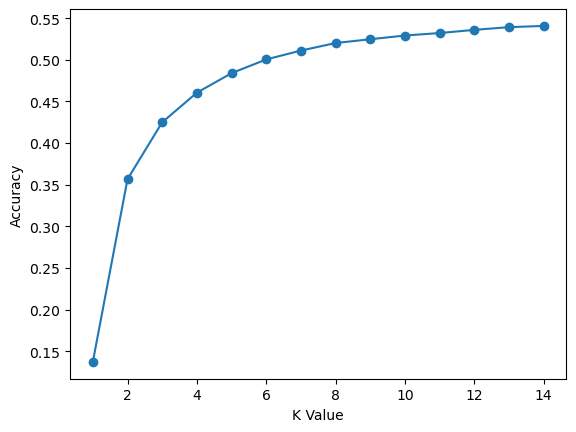

In [47]:
plt.plot (neighbors, k_metric, 'o-')
plt.xlabel ('K Value')
plt.ylabel ('Accuracy')

In [55]:
KNN = KNeighborsRegressor(n_neighbors = 5)
model = KNN.fit (ip_train, op_train)
pred_KNN = model.predict (ip_test) 

In [57]:
from sklearn.metrics import mean_squared_error
print ('mse:', mean_squared_error (op_test, pred_KNN))
from sklearn.metrics import r2_score
print ('r2_score:', r2_score (op_test, pred_KNN))

mse: 2976818677.293661
r2_score: 0.4838927349391171
